# WEEK 4: Product and Territory Analysis

In [1]:
#Import the sqlite3 module and other libraries

import sqlite3
import pandas as pd
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import time series-specific libraries
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Date handling
import datetime

IMPORT MERGED DATA INTO PYTHON IDE (Merged Data contains the combination of all tables with their products and sales)

In [2]:
df = pd.read_csv('C:/Users/Adekoyejo.dada/Desktop/3signet/Merged_AdventureWorks_Data_ProductsandAdventureWorks_Product_Subcategories.csv')

In [3]:
#Convert the date column to datetime format
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['StockDate'] = pd.to_datetime(df['StockDate'])

In [4]:
df['OrderDate'] = df['OrderDate'].dt.strftime('%Y/%m/%d')
df['StockDate'] = df['StockDate'].dt.strftime('%Y/%m/%d')

In [5]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56046 entries, 0 to 56045
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ROW_ID              56046 non-null  int64  
 1   OrderDate           56046 non-null  object 
 2   StockDate           56046 non-null  object 
 3   OrderNumber         56046 non-null  object 
 4   CustomerKey         56046 non-null  int64  
 5   TerritoryKey        56046 non-null  int64  
 6   OrderLineItem       56046 non-null  int64  
 7   OrderQuantity       56046 non-null  int64  
 8   ProductSKU          56046 non-null  object 
 9   ProductName         56046 non-null  object 
 10  ModelName           56046 non-null  object 
 11  ProductDescription  56046 non-null  object 
 12  ProductColor        29168 non-null  object 
 13  ProductSize         56046 non-null  object 
 14  ProductStyle        56046 non-null  object 
 15  ProductCost         56046 non-null  float64
 16  Prod

In [6]:
df2 = pd.read_csv('C:/Users/Adekoyejo.dada/Desktop/3signet/AdventureWorks_Products.csv')

In [7]:
#Join the df table and df2 table based on ProductName

merged_data =pd.merge(df, df2, on='ProductName', how = 'inner')

In [8]:
print (merged_data)

       ROW_ID   OrderDate   StockDate OrderNumber  CustomerKey  TerritoryKey  \
0           1  2015/01/01  2001/09/21     SO45080        14657             1   
1         222  2015/02/06  2001/10/12     SO45383        14734             1   
2         367  2015/03/03  2002/01/27     SO45596        20564            10   
3         521  2015/03/26  2002/02/05     SO45748        18046             7   
4         626  2015/04/14  2002/02/12     SO45894        19450             8   
...       ...         ...         ...         ...          ...           ...   
56041   49366  2017/05/24  2004/04/08     SO71270        11084             1   
56042   50929  2017/06/03  2004/04/25     SO72126        11368             9   
56043   51460  2017/06/06  2004/04/25     SO72355        11359             9   
56044   51708  2017/06/07  2004/03/29     SO72419        26647             4   
56045   52491  2017/06/11  2004/04/01     SO72699        27899             7   

       OrderLineItem  OrderQuantity Pro

In [9]:
df.to_csv('merged_data.csv', index = False)

# Analysis of Product Performance and Trends including product lifecycle and sales distribution

In [10]:
#Calculate total revenue for each product (quantity * price)

merged_data['total_revenue'] = merged_data['OrderQuantity'] * merged_data['ProductPrice_y'] 


In [63]:
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56046 entries, 0 to 56045
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ROW_ID                 56046 non-null  int64  
 1   OrderDate              56046 non-null  object 
 2   StockDate              56046 non-null  object 
 3   OrderNumber            56046 non-null  object 
 4   CustomerKey            56046 non-null  int64  
 5   TerritoryKey           56046 non-null  int64  
 6   OrderLineItem          56046 non-null  int64  
 7   OrderQuantity          56046 non-null  int64  
 8   ProductSKU_x           56046 non-null  object 
 9   ProductName            56046 non-null  object 
 10  ModelName_x            56046 non-null  object 
 11  ProductDescription_x   56046 non-null  object 
 12  ProductColor_x         29168 non-null  object 
 13  ProductSize_x          56046 non-null  object 
 14  ProductStyle_x         56046 non-null  object 
 15  Pr

In [11]:
#Group by productkey and productname to get total revenue per product

product_revenue = merged_data.groupby(['ProductKey', 'ProductName'])['total_revenue'].sum().reset_index()

print(product_revenue)

     ProductKey                 ProductName  total_revenue
0           214       Sport-100 Helmet, Red     73444.0100
1           215     Sport-100 Helmet, Black     65269.7480
2           220      Sport-100 Helmet, Blue     67120.1790
3           223                AWC Logo Cap     35882.0742
4           226  Long-Sleeve Logo Jersey, S     18842.3816
..          ...                         ...            ...
125         599      Mountain-500 Black, 48     29699.4500
126         600      Mountain-500 Black, 52     22139.5900
127         604          Road-750 Black, 44    192236.4400
128         605          Road-750 Black, 48    191696.4500
129         606          Road-750 Black, 52    206816.1700

[130 rows x 3 columns]


In [12]:
# Group data by 'ProductKey', 'ProductName' and total_revenue
product_performance = product_revenue.groupby(['ProductKey', 'ProductName'])['total_revenue'].sum().sort_values(ascending=False)

# Display top 10 products 
print("Top Performing Products:\n", product_performance.head(10))

Top Performing Products:
 ProductKey  ProductName            
362         Mountain-200 Black, 46     1.241754e+06
360         Mountain-200 Black, 42     1.233557e+06
352         Mountain-200 Silver, 38    1.213852e+06
356         Mountain-200 Silver, 46    1.182781e+06
358         Mountain-200 Black, 38     1.165937e+06
354         Mountain-200 Silver, 42    1.133067e+06
377         Road-250 Black, 52         6.893738e+05
371         Road-250 Red, 58           6.610134e+05
375         Road-250 Black, 48         6.413794e+05
312         Road-150 Red, 48           6.405103e+05
Name: total_revenue, dtype: float64


# Deliverable 2: Analysis of sales performance across different territories.

In [13]:
# The merged data was saved as a csv file in the directory and it contains all the data from all the tables needed for this question
fact_table = pd.read_csv('C:/Users/Adekoyejo.dada/Desktop/3signet/merged_data.csv') 
dimension_table = pd.read_csv('C:/Users/Adekoyejo.dada/Desktop/3signet/AdventureWorks_Territories.csv')

In [35]:
#Convert the date column to datetime format
fact_table['OrderDate'] = pd.to_datetime(fact_table['OrderDate'])
fact_table['StockDate'] = pd.to_datetime(fact_table['StockDate'])

In [36]:
print(fact_table.info())
print(fact_table.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56046 entries, 0 to 56045
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ROW_ID              56046 non-null  int64         
 1   OrderDate           56046 non-null  datetime64[ns]
 2   StockDate           56046 non-null  datetime64[ns]
 3   OrderNumber         56046 non-null  object        
 4   CustomerKey         56046 non-null  int64         
 5   TerritoryKey        56046 non-null  int64         
 6   OrderLineItem       56046 non-null  int64         
 7   OrderQuantity       56046 non-null  int64         
 8   ProductSKU          56046 non-null  object        
 9   ProductName         56046 non-null  object        
 10  ModelName           56046 non-null  object        
 11  ProductDescription  56046 non-null  object        
 12  ProductColor        29168 non-null  object        
 13  ProductSize         56046 non-null  object    

In [37]:
fact_table['OrderDate'] = fact_table['OrderDate'].dt.strftime('%Y/%m/%d')
fact_table['StockDate'] = fact_table['StockDate'].dt.strftime('%Y/%m/%d')

In [38]:
dimension_table.rename(columns={'SalesTerritoryKey' : 'TerritoryKey'}, inplace=True)

In [39]:
#Join the fact table and dimension table based on TerritoryKey

merged_territory_data =pd.merge(fact_table, dimension_table, on='TerritoryKey', how = 'inner')

In [40]:
print(merged_territory_data)

       ROW_ID   OrderDate   StockDate OrderNumber  CustomerKey  TerritoryKey  \
0           1  2015/01/01  2001/09/21     SO45080        14657             1   
1          19  2015/01/04  2001/09/15     SO45098        29167             1   
2          21  2015/01/04  2001/12/20     SO45099        29174             1   
3          28  2015/01/06  2001/09/24     SO45103        29140             1   
4          36  2015/01/08  2001/11/21     SO45117        14727             1   
...       ...         ...         ...         ...          ...           ...   
56041   50479  2017/05/31  2004/03/29     SO71714        27657             3   
56042   50480  2017/05/31  2004/02/26     SO71714        27657             3   
56043   50481  2017/05/31  2004/02/29     SO71714        27657             3   
56044   52332  2017/06/11  2004/04/18     SO72686        11676             3   
56045   52333  2017/06/11  2004/03/31     SO72686        11676             3   

       OrderLineItem  OrderQuantity  Pr

In [41]:
region_sales = merged_territory_data.groupby(['TerritoryKey', 'Region'])['OrderQuantity'].sum().reset_index()

print(region_sales)

   TerritoryKey          Region  OrderQuantity
0             1       Northwest          12513
1             2       Northeast             40
2             3         Central             30
3             4       Southwest          17191
4             5       Southeast             49
5             6          Canada          10894
6             7          France           7862
7             8         Germany           7950
8             9       Australia          17951
9            10  United Kingdom           9694


In [42]:
top_regions = region_sales.sort_values(by='OrderQuantity', ascending=False).head(3)

In [55]:
print(top_regions)

   TerritoryKey     Region  OrderQuantity
8             9  Australia          17951
3             4  Southwest          17191
0             1  Northwest          12513


In [56]:
df = pd.DataFrame(top_regions)

# Chart showing the high and low performing regions respectively.

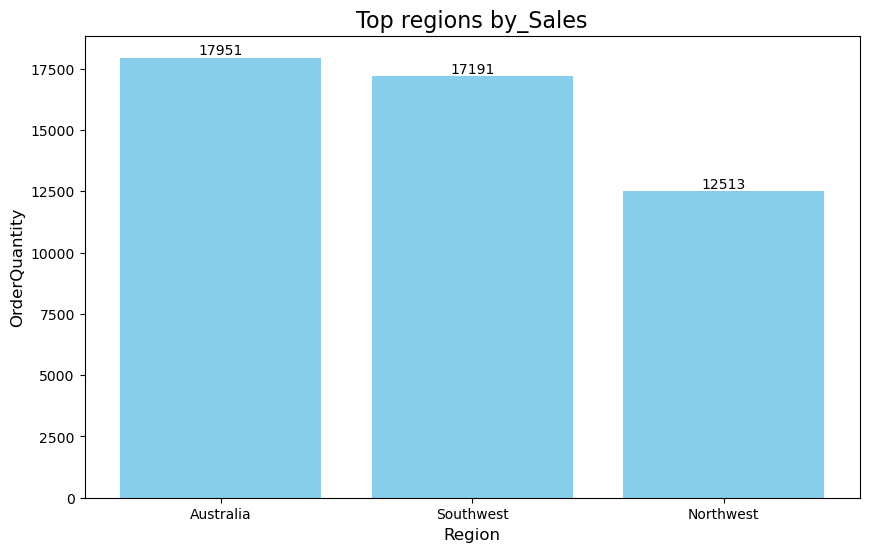

In [58]:
plt.figure(figsize=(10,6))
bars = plt.bar(df['Region'], df['OrderQuantity'], color ='skyblue')
# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar (OrderQuantity)
    plt.text(
        bar.get_x() + bar.get_width()/2,  # X position: center of the bar
        yval,  # Y position: height of the bar
        int(yval),  # The actual value to be displayed as text (integer value of OrderQuantity)
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment (text placed just above the bar)
        fontsize=10  # Set the font size of the labels
    )

plt.bar(df['Region'], df['OrderQuantity'], color='skyblue')
plt.title('Top regions by_Sales', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('OrderQuantity', fontsize=12)
plt.show()

In [46]:
bottom_regions = region_sales.sort_values(by='OrderQuantity', ascending=True).tail(4)

In [47]:
print(bottom_regions)

   TerritoryKey     Region  OrderQuantity
5             6     Canada          10894
0             1  Northwest          12513
3             4  Southwest          17191
8             9  Australia          17951


In [48]:
df = pd.DataFrame(bottom_regions)

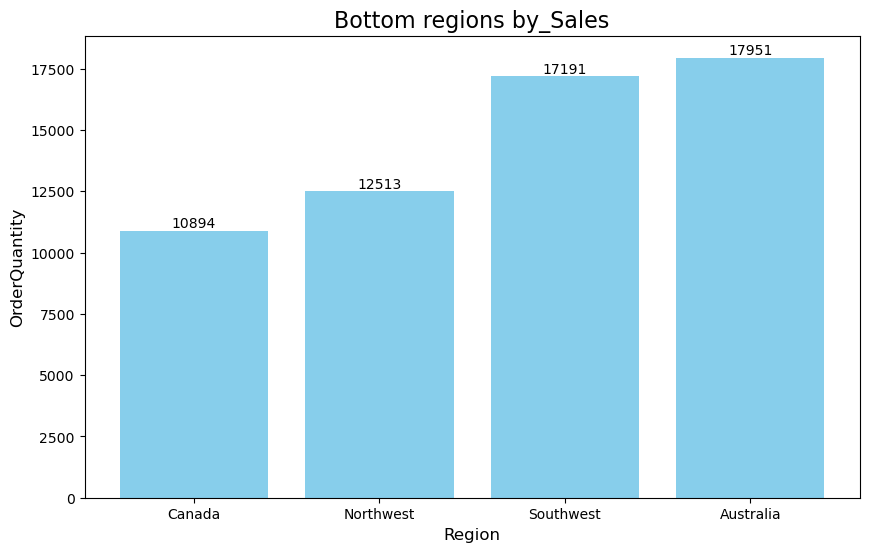

In [51]:
plt.figure(figsize=(10,6))
bars = plt.bar(df['Region'], df['OrderQuantity'], color ='skyblue')
plt.bar(df['Region'], df['OrderQuantity'], color='skyblue')
# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar (OrderQuantity value)
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2),
             ha='center', va='bottom', fontsize=10)  # Label centered at the top of the bar
plt.title('Bottom regions by_Sales', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('OrderQuantity', fontsize=12)
plt.show()

# Deliverable 3: Impact of External factors like Weather and Holidays on Product and Territory Performance

In [74]:
import holidays

In [75]:
dimension_table = pd.read_csv('C:/Users/Adekoyejo.dada/Desktop/3signet/AdventureWorks_Products.csv')

In [86]:
dimension_table.columns

Index(['ProductKey', 'ProductSubcategoryKey', 'ProductSKU', 'ProductName',
       'ModelName', 'ProductDescription', 'ProductColor', 'ProductSize',
       'ProductStyle', 'ProductCost', 'ProductPrice', 'Profit'],
      dtype='object')

In [106]:
merged_territory_data.columns

Index(['ROW_ID', 'OrderDate', 'StockDate', 'OrderNumber', 'CustomerKey',
       'TerritoryKey', 'OrderLineItem', 'OrderQuantity', 'ProductSKU',
       'ProductName', 'ModelName', 'ProductDescription', 'ProductColor',
       'ProductSize', 'ProductStyle', 'ProductCost', 'ProductPrice',
       'SubcategoryName', 'ProductCategoryKey', 'Region', 'Country',
       'Continent'],
      dtype='object')

In [155]:
#Join the two tables based on ProductName

merged_data =pd.merge(dimension_table, merged_territory_data, on='ProductName', how = 'inner')

In [108]:
print(merged_data)

       ProductKey  ProductSubcategoryKey ProductSKU_x            ProductName  \
0             214                     31    HL-U509-R  Sport-100 Helmet, Red   
1             214                     31    HL-U509-R  Sport-100 Helmet, Red   
2             214                     31    HL-U509-R  Sport-100 Helmet, Red   
3             214                     31    HL-U509-R  Sport-100 Helmet, Red   
4             214                     31    HL-U509-R  Sport-100 Helmet, Red   
...           ...                    ...          ...                    ...   
56041         606                      2   BK-R19B-52     Road-750 Black, 52   
56042         606                      2   BK-R19B-52     Road-750 Black, 52   
56043         606                      2   BK-R19B-52     Road-750 Black, 52   
56044         606                      2   BK-R19B-52     Road-750 Black, 52   
56045         606                      2   BK-R19B-52     Road-750 Black, 52   

      ModelName_x                      

Country: United States 

In [109]:
# Convert the date column to datetime format
merged_data['OrderDate'] = pd.to_datetime(merged_data['OrderDate'])
merged_data['StockDate'] = pd.to_datetime(merged_data['StockDate'])


# Create a new column for holidays
us_holidays = holidays.UnitedStates()  
merged_data['Is_Holiday'] = merged_data['OrderDate'].apply(lambda x: x in us_holidays)

# Display the updated DataFrame
merged_data.head()

,ProductKey,ProductSubcategoryKey,ProductSKU_x,ProductName,ModelName_x,ProductDescription_x,ProductColor_x,ProductSize_x,ProductStyle_x,ProductCost_x,...,ProductSize_y,ProductStyle_y,ProductCost_y,ProductPrice_y,SubcategoryName,ProductCategoryKey,Region,Country,Continent,Is_Holiday
0,214,31,HL-U509-R,"Sport-100 Helmet, Red",Sport-100,"Universal fit, well-vented, lightweight , snap...",Red,0,0,13.0863,...,0,0,13.0863,34.99,Helmets,4,Northwest,United States,North America,False
1,214,31,HL-U509-R,"Sport-100 Helmet, Red",Sport-100,"Universal fit, well-vented, lightweight , snap...",Red,0,0,13.0863,...,0,0,13.0863,34.99,Helmets,4,Northwest,United States,North America,False
2,214,31,HL-U509-R,"Sport-100 Helmet, Red",Sport-100,"Universal fit, well-vented, lightweight , snap...",Red,0,0,13.0863,...,0,0,13.0863,34.99,Helmets,4,Northwest,United States,North America,False
3,214,31,HL-U509-R,"Sport-100 Helmet, Red",Sport-100,"Universal fit, well-vented, lightweight , snap...",Red,0,0,13.0863,...,0,0,13.0863,34.99,Helmets,4,Northwest,United States,North America,False
4,214,31,HL-U509-R,"Sport-100 Helmet, Red",Sport-100,"Universal fit, well-vented, lightweight , snap...",Red,0,0,13.0863,...,0,0,13.0863,34.99,Helmets,4,Northwest,United States,North America,False


In [180]:
# Group by Product and Territory, and aggregate sales
performance = merged_data.groupby(['ProductKey', 'TerritoryKey', 'Country','Is_Holiday'])['OrderQuantity'].sum().reset_index()

# Display the performance summary
performance

holidays_sales_data = performance[(performance['Country'] == 'United States') & (performance['Is_Holiday']==True)]

In [181]:
product_territory_performance = holidays_sales_data.groupby(['ProductKey', 'TerritoryKey', 'Country']).agg(
    Total_orders=('OrderQuantity', 'sum'),
    Average_orders=('OrderQuantity', 'mean'),
    Count_transactions=('OrderQuantity', 'count')
).reset_index()

In [182]:
print(product_territory_performance)

     ProductKey  TerritoryKey        Country  Total_orders  Average_orders  \
0           214             1  United States             7             7.0   
1           214             4  United States            11            11.0   
2           215             1  United States             7             7.0   
3           215             4  United States            10            10.0   
4           220             1  United States            10            10.0   
..          ...           ...            ...           ...             ...   
121         604             4  United States             1             1.0   
122         605             1  United States             1             1.0   
123         605             4  United States             1             1.0   
124         606             1  United States             2             2.0   
125         606             4  United States             2             2.0   

     Count_transactions  
0                     1  
1          

In [183]:
df = pd.DataFrame(product_territory_performance)

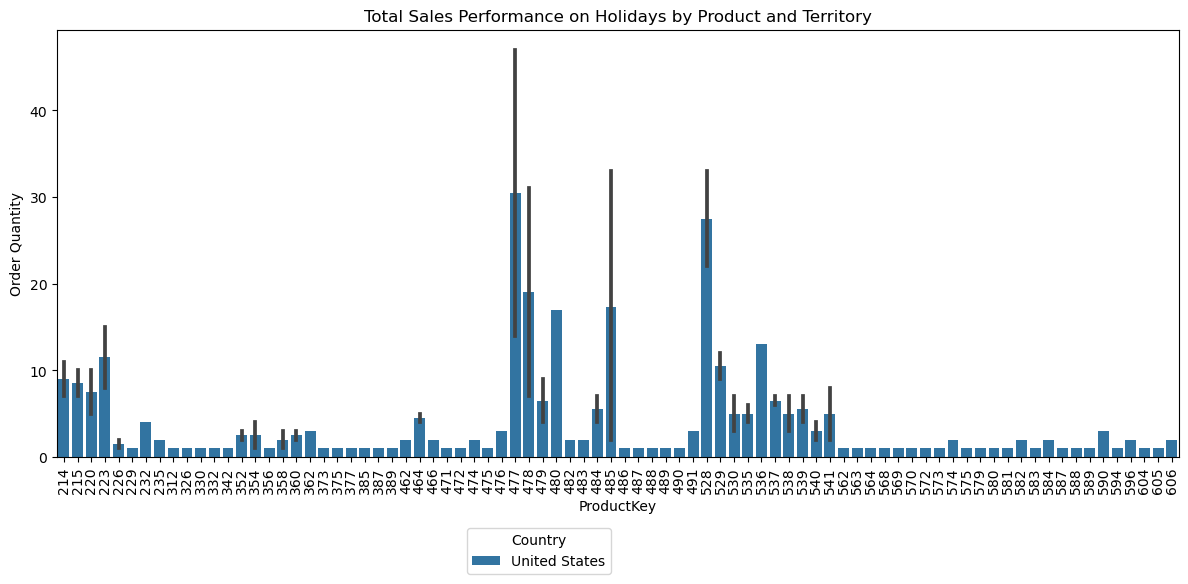

In [184]:
plt.figure(figsize=(12, 6))
sns.barplot(data=product_territory_performance, x='ProductKey', y='Total_orders', hue='Country')
plt.title('Total Sales Performance on Holidays by Product and Territory')
plt.xticks(rotation=90)
plt.ylabel('Order Quantity')
plt.xlabel('ProductKey')
plt.legend(title='Country',loc='upper right', bbox_to_anchor=(0.5, -0.15))
plt.tight_layout()
plt.show()

Country: Canada

In [188]:
dimension_table = pd.read_csv('C:/Users/Adekoyejo.dada/Desktop/3signet/AdventureWorks_Products.csv')

In [170]:
#Join the two tables based on ProductName

merged_data =pd.merge(dimension_table, merged_territory_data, on='ProductName', how = 'inner')
print(merged_data)
print(merged_data.info())

       ProductKey  ProductSubcategoryKey ProductSKU_x            ProductName  \
0             214                     31    HL-U509-R  Sport-100 Helmet, Red   
1             214                     31    HL-U509-R  Sport-100 Helmet, Red   
2             214                     31    HL-U509-R  Sport-100 Helmet, Red   
3             214                     31    HL-U509-R  Sport-100 Helmet, Red   
4             214                     31    HL-U509-R  Sport-100 Helmet, Red   
...           ...                    ...          ...                    ...   
56041         606                      2   BK-R19B-52     Road-750 Black, 52   
56042         606                      2   BK-R19B-52     Road-750 Black, 52   
56043         606                      2   BK-R19B-52     Road-750 Black, 52   
56044         606                      2   BK-R19B-52     Road-750 Black, 52   
56045         606                      2   BK-R19B-52     Road-750 Black, 52   

      ModelName_x                      

In [171]:
# Convert the date column to datetime format
merged_data['OrderDate'] = pd.to_datetime(merged_data['OrderDate'])
merged_data['StockDate'] = pd.to_datetime(merged_data['StockDate'])


In [176]:
# Create a list of Canadian holidays
ca_holidays = holidays.Canada()
merged_data['Is_Holiday'] = merged_data['OrderDate'].apply(lambda x:x in ca_holidays)
print(merged_data)

       ProductKey  ProductSubcategoryKey ProductSKU_x            ProductName  \
0             214                     31    HL-U509-R  Sport-100 Helmet, Red   
1             214                     31    HL-U509-R  Sport-100 Helmet, Red   
2             214                     31    HL-U509-R  Sport-100 Helmet, Red   
3             214                     31    HL-U509-R  Sport-100 Helmet, Red   
4             214                     31    HL-U509-R  Sport-100 Helmet, Red   
...           ...                    ...          ...                    ...   
56041         606                      2   BK-R19B-52     Road-750 Black, 52   
56042         606                      2   BK-R19B-52     Road-750 Black, 52   
56043         606                      2   BK-R19B-52     Road-750 Black, 52   
56044         606                      2   BK-R19B-52     Road-750 Black, 52   
56045         606                      2   BK-R19B-52     Road-750 Black, 52   

      ModelName_x                      

In [185]:
# Group by Product and Territory, and aggregate sales
performance = merged_data.groupby(['ProductKey', 'TerritoryKey', 'Country','Is_Holiday'])['OrderQuantity'].sum().reset_index()

# Display the performance summary
performance

holidays_sales_data = performance[(performance['Country'] == 'Cananda') & (performance['Is_Holiday']==True)]

In [186]:
product_territory_performance = holidays_sales_data.groupby(['ProductKey', 'TerritoryKey', 'Country']).agg(
    Total_orders=('OrderQuantity', 'sum'),
    Average_orders=('OrderQuantity', 'mean'),
    Count_transactions=('OrderQuantity', 'count')
).reset_index()

In [187]:
print (product_territory_performance)

Empty DataFrame
Columns: [ProductKey, TerritoryKey, Country, Total_orders, Average_orders, Count_transactions]
Index: []


This is showing there is no holiday data in Cananda, Hence it cannot be further analysed.

Country:France 

In [189]:
dimension_table = pd.read_csv('C:/Users/Adekoyejo.dada/Desktop/3signet/AdventureWorks_Products.csv')

In [190]:
#Join the two tables based on ProductName

merged_data =pd.merge(dimension_table, merged_territory_data, on='ProductName', how = 'inner')
print(merged_data)
print(merged_data.info())

       ProductKey  ProductSubcategoryKey ProductSKU_x            ProductName  \
0             214                     31    HL-U509-R  Sport-100 Helmet, Red   
1             214                     31    HL-U509-R  Sport-100 Helmet, Red   
2             214                     31    HL-U509-R  Sport-100 Helmet, Red   
3             214                     31    HL-U509-R  Sport-100 Helmet, Red   
4             214                     31    HL-U509-R  Sport-100 Helmet, Red   
...           ...                    ...          ...                    ...   
56041         606                      2   BK-R19B-52     Road-750 Black, 52   
56042         606                      2   BK-R19B-52     Road-750 Black, 52   
56043         606                      2   BK-R19B-52     Road-750 Black, 52   
56044         606                      2   BK-R19B-52     Road-750 Black, 52   
56045         606                      2   BK-R19B-52     Road-750 Black, 52   

      ModelName_x                      

In [192]:
# Convert the date column to datetime format
merged_data['OrderDate'] = pd.to_datetime(merged_data['OrderDate'])
merged_data['StockDate'] = pd.to_datetime(merged_data['StockDate'])


In [193]:
# Create a list of French holidays
fr_holidays = holidays.France()
merged_data['Is_Holiday'] = merged_data['OrderDate'].apply(lambda x:x in fr_holidays)
print(merged_data)

       ProductKey  ProductSubcategoryKey ProductSKU_x            ProductName  \
0             214                     31    HL-U509-R  Sport-100 Helmet, Red   
1             214                     31    HL-U509-R  Sport-100 Helmet, Red   
2             214                     31    HL-U509-R  Sport-100 Helmet, Red   
3             214                     31    HL-U509-R  Sport-100 Helmet, Red   
4             214                     31    HL-U509-R  Sport-100 Helmet, Red   
...           ...                    ...          ...                    ...   
56041         606                      2   BK-R19B-52     Road-750 Black, 52   
56042         606                      2   BK-R19B-52     Road-750 Black, 52   
56043         606                      2   BK-R19B-52     Road-750 Black, 52   
56044         606                      2   BK-R19B-52     Road-750 Black, 52   
56045         606                      2   BK-R19B-52     Road-750 Black, 52   

      ModelName_x                      

In [194]:
# Group by Product and Territory, and aggregate sales
performance = merged_data.groupby(['ProductKey', 'TerritoryKey', 'Country','Is_Holiday'])['OrderQuantity'].sum().reset_index()

# Display the performance summary
performance

holidays_sales_data = performance[(performance['Country'] == 'France') & (performance['Is_Holiday']==True)]

In [195]:
product_territory_performance = holidays_sales_data.groupby(['ProductKey', 'TerritoryKey', 'Country']).agg(
    Total_orders=('OrderQuantity', 'sum'),
    Average_orders=('OrderQuantity', 'mean'),
    Count_transactions=('OrderQuantity', 'count')
).reset_index()

In [196]:
print (product_territory_performance)

    ProductKey  TerritoryKey Country  Total_orders  Average_orders  \
0          214             7  France             7             7.0   
1          215             7  France             9             9.0   
2          220             7  France             7             7.0   
3          223             7  France            17            17.0   
4          226             7  France             2             2.0   
5          235             7  France             2             2.0   
6          311             7  France             1             1.0   
7          312             7  France             1             1.0   
8          313             7  France             1             1.0   
9          320             7  France             1             1.0   
10         324             7  France             1             1.0   
11         328             7  France             1             1.0   
12         332             7  France             1             1.0   
13         338      

In [197]:
df = pd.DataFrame(product_territory_performance)

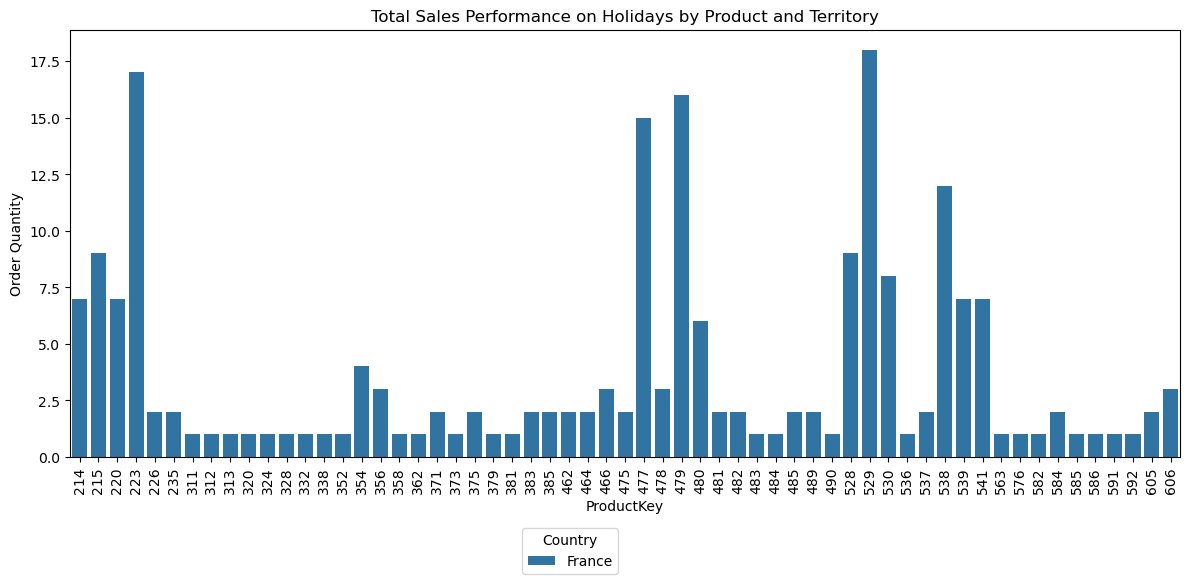

In [198]:
plt.figure(figsize=(12, 6))
sns.barplot(data=product_territory_performance, x='ProductKey', y='Total_orders', hue='Country')
plt.title('Total Sales Performance on Holidays by Product and Territory')
plt.xticks(rotation=90)
plt.ylabel('Order Quantity')
plt.xlabel('ProductKey')
plt.legend(title='Country',loc='upper right', bbox_to_anchor=(0.5, -0.15))
plt.tight_layout()
plt.show()

Country: Germany

In [199]:
dimension_table = pd.read_csv('C:/Users/Adekoyejo.dada/Desktop/3signet/AdventureWorks_Products.csv')

In [200]:
#Join the two tables based on ProductName

merged_data =pd.merge(dimension_table, merged_territory_data, on='ProductName', how = 'inner')
print(merged_data)
print(merged_data.info())

       ProductKey  ProductSubcategoryKey ProductSKU_x            ProductName  \
0             214                     31    HL-U509-R  Sport-100 Helmet, Red   
1             214                     31    HL-U509-R  Sport-100 Helmet, Red   
2             214                     31    HL-U509-R  Sport-100 Helmet, Red   
3             214                     31    HL-U509-R  Sport-100 Helmet, Red   
4             214                     31    HL-U509-R  Sport-100 Helmet, Red   
...           ...                    ...          ...                    ...   
56041         606                      2   BK-R19B-52     Road-750 Black, 52   
56042         606                      2   BK-R19B-52     Road-750 Black, 52   
56043         606                      2   BK-R19B-52     Road-750 Black, 52   
56044         606                      2   BK-R19B-52     Road-750 Black, 52   
56045         606                      2   BK-R19B-52     Road-750 Black, 52   

      ModelName_x                      

In [201]:
# Convert the date column to datetime format
merged_data['OrderDate'] = pd.to_datetime(merged_data['OrderDate'])
merged_data['StockDate'] = pd.to_datetime(merged_data['StockDate'])


In [202]:
ge_holidays = holidays.Germany()
merged_data['Is_Holiday'] = merged_data['OrderDate'].apply(lambda x:x in fr_holidays)
print(merged_data)

       ProductKey  ProductSubcategoryKey ProductSKU_x            ProductName  \
0             214                     31    HL-U509-R  Sport-100 Helmet, Red   
1             214                     31    HL-U509-R  Sport-100 Helmet, Red   
2             214                     31    HL-U509-R  Sport-100 Helmet, Red   
3             214                     31    HL-U509-R  Sport-100 Helmet, Red   
4             214                     31    HL-U509-R  Sport-100 Helmet, Red   
...           ...                    ...          ...                    ...   
56041         606                      2   BK-R19B-52     Road-750 Black, 52   
56042         606                      2   BK-R19B-52     Road-750 Black, 52   
56043         606                      2   BK-R19B-52     Road-750 Black, 52   
56044         606                      2   BK-R19B-52     Road-750 Black, 52   
56045         606                      2   BK-R19B-52     Road-750 Black, 52   

      ModelName_x                      

In [203]:
# Group by Product and Territory, and aggregate sales
performance = merged_data.groupby(['ProductKey', 'TerritoryKey', 'Country','Is_Holiday'])['OrderQuantity'].sum().reset_index()

# Display the performance summary
performance

holidays_sales_data = performance[(performance['Country'] == 'Germany') & (performance['Is_Holiday']==True)]

In [204]:
product_territory_performance = holidays_sales_data.groupby(['ProductKey', 'TerritoryKey', 'Country']).agg(
    Total_orders=('OrderQuantity', 'sum'),
    Average_orders=('OrderQuantity', 'mean'),
    Count_transactions=('OrderQuantity', 'count')
).reset_index()

In [205]:
print (product_territory_performance)

    ProductKey  TerritoryKey  Country  Total_orders  Average_orders  \
0          214             8  Germany             7             7.0   
1          215             8  Germany             7             7.0   
2          220             8  Germany             3             3.0   
3          223             8  Germany            17            17.0   
4          226             8  Germany             2             2.0   
..         ...           ...      ...           ...             ...   
62         598             8  Germany             1             1.0   
63         600             8  Germany             1             1.0   
64         604             8  Germany             1             1.0   
65         605             8  Germany             2             2.0   
66         606             8  Germany             1             1.0   

    Count_transactions  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1

In [206]:
df = pd.DataFrame(product_territory_performance)

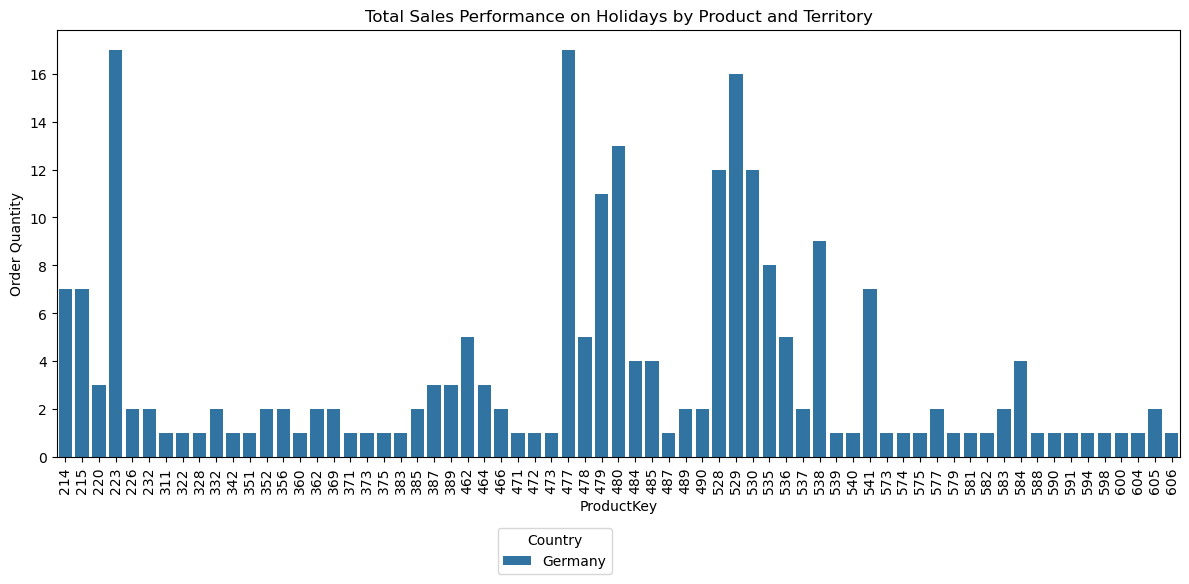

In [207]:
plt.figure(figsize=(12, 6))
sns.barplot(data=product_territory_performance, x='ProductKey', y='Total_orders', hue='Country')
plt.title('Total Sales Performance on Holidays by Product and Territory')
plt.xticks(rotation=90)
plt.ylabel('Order Quantity')
plt.xlabel('ProductKey')
plt.legend(title='Country',loc='upper right', bbox_to_anchor=(0.5, -0.15))
plt.tight_layout()
plt.show()

Country: Australia

In [208]:
dimension_table = pd.read_csv('C:/Users/Adekoyejo.dada/Desktop/3signet/AdventureWorks_Products.csv')

In [209]:
#Join the two tables based on ProductName

merged_data =pd.merge(dimension_table, merged_territory_data, on='ProductName', how = 'inner')
print(merged_data)
print(merged_data.info())

       ProductKey  ProductSubcategoryKey ProductSKU_x            ProductName  \
0             214                     31    HL-U509-R  Sport-100 Helmet, Red   
1             214                     31    HL-U509-R  Sport-100 Helmet, Red   
2             214                     31    HL-U509-R  Sport-100 Helmet, Red   
3             214                     31    HL-U509-R  Sport-100 Helmet, Red   
4             214                     31    HL-U509-R  Sport-100 Helmet, Red   
...           ...                    ...          ...                    ...   
56041         606                      2   BK-R19B-52     Road-750 Black, 52   
56042         606                      2   BK-R19B-52     Road-750 Black, 52   
56043         606                      2   BK-R19B-52     Road-750 Black, 52   
56044         606                      2   BK-R19B-52     Road-750 Black, 52   
56045         606                      2   BK-R19B-52     Road-750 Black, 52   

      ModelName_x                      

In [210]:
# Convert the date column to datetime format
merged_data['OrderDate'] = pd.to_datetime(merged_data['OrderDate'])
merged_data['StockDate'] = pd.to_datetime(merged_data['StockDate'])


In [211]:
Au_holidays = holidays.Australia()
merged_data['Is_Holiday'] = merged_data['OrderDate'].apply(lambda x:x in fr_holidays)
print(merged_data)

       ProductKey  ProductSubcategoryKey ProductSKU_x            ProductName  \
0             214                     31    HL-U509-R  Sport-100 Helmet, Red   
1             214                     31    HL-U509-R  Sport-100 Helmet, Red   
2             214                     31    HL-U509-R  Sport-100 Helmet, Red   
3             214                     31    HL-U509-R  Sport-100 Helmet, Red   
4             214                     31    HL-U509-R  Sport-100 Helmet, Red   
...           ...                    ...          ...                    ...   
56041         606                      2   BK-R19B-52     Road-750 Black, 52   
56042         606                      2   BK-R19B-52     Road-750 Black, 52   
56043         606                      2   BK-R19B-52     Road-750 Black, 52   
56044         606                      2   BK-R19B-52     Road-750 Black, 52   
56045         606                      2   BK-R19B-52     Road-750 Black, 52   

      ModelName_x                      

In [212]:
# Group by Product and Territory, and aggregate sales
performance = merged_data.groupby(['ProductKey', 'TerritoryKey', 'Country','Is_Holiday'])['OrderQuantity'].sum().reset_index()

# Display the performance summary
performance

holidays_sales_data = performance[(performance['Country'] == 'Australia') & (performance['Is_Holiday']==True)]

In [213]:
product_territory_performance = holidays_sales_data.groupby(['ProductKey', 'TerritoryKey', 'Country']).agg(
    Total_orders=('OrderQuantity', 'sum'),
    Average_orders=('OrderQuantity', 'mean'),
    Count_transactions=('OrderQuantity', 'count')
).reset_index()

In [214]:
print (product_territory_performance)

    ProductKey  TerritoryKey    Country  Total_orders  Average_orders  \
0          214             9  Australia            16            16.0   
1          215             9  Australia            11            11.0   
2          220             9  Australia            14            14.0   
3          223             9  Australia            29            29.0   
4          226             9  Australia             2             2.0   
..         ...           ...        ...           ...             ...   
90         589             9  Australia             2             2.0   
91         590             9  Australia             2             2.0   
92         604             9  Australia             3             3.0   
93         605             9  Australia             1             1.0   
94         606             9  Australia             7             7.0   

    Count_transactions  
0                    1  
1                    1  
2                    1  
3                    1 

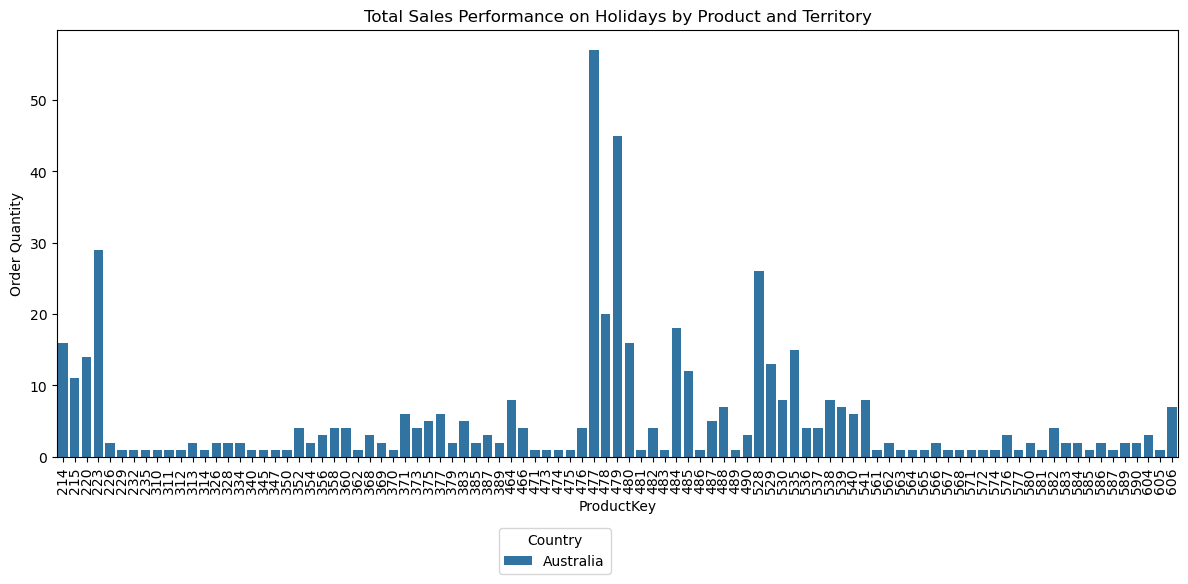

In [215]:
plt.figure(figsize=(12, 6))
sns.barplot(data=product_territory_performance, x='ProductKey', y='Total_orders', hue='Country')
plt.title('Total Sales Performance on Holidays by Product and Territory')
plt.xticks(rotation=90)
plt.ylabel('Order Quantity')
plt.xlabel('ProductKey')
plt.legend(title='Country',loc='upper right', bbox_to_anchor=(0.5, -0.15))
plt.tight_layout()
plt.show()

Country: United Kingdom

In [216]:
dimension_table = pd.read_csv('C:/Users/Adekoyejo.dada/Desktop/3signet/AdventureWorks_Products.csv')

In [217]:
#Join the two tables based on ProductName

merged_data =pd.merge(dimension_table, merged_territory_data, on='ProductName', how = 'inner')
print(merged_data)
print(merged_data.info())

       ProductKey  ProductSubcategoryKey ProductSKU_x            ProductName  \
0             214                     31    HL-U509-R  Sport-100 Helmet, Red   
1             214                     31    HL-U509-R  Sport-100 Helmet, Red   
2             214                     31    HL-U509-R  Sport-100 Helmet, Red   
3             214                     31    HL-U509-R  Sport-100 Helmet, Red   
4             214                     31    HL-U509-R  Sport-100 Helmet, Red   
...           ...                    ...          ...                    ...   
56041         606                      2   BK-R19B-52     Road-750 Black, 52   
56042         606                      2   BK-R19B-52     Road-750 Black, 52   
56043         606                      2   BK-R19B-52     Road-750 Black, 52   
56044         606                      2   BK-R19B-52     Road-750 Black, 52   
56045         606                      2   BK-R19B-52     Road-750 Black, 52   

      ModelName_x                      

In [218]:
# Convert the date column to datetime format
merged_data['OrderDate'] = pd.to_datetime(merged_data['OrderDate'])
merged_data['StockDate'] = pd.to_datetime(merged_data['StockDate'])


In [219]:
UK_holidays = holidays.UnitedKingdom()
merged_data['Is_Holiday'] = merged_data['OrderDate'].apply(lambda x:x in fr_holidays)
print(merged_data)

       ProductKey  ProductSubcategoryKey ProductSKU_x            ProductName  \
0             214                     31    HL-U509-R  Sport-100 Helmet, Red   
1             214                     31    HL-U509-R  Sport-100 Helmet, Red   
2             214                     31    HL-U509-R  Sport-100 Helmet, Red   
3             214                     31    HL-U509-R  Sport-100 Helmet, Red   
4             214                     31    HL-U509-R  Sport-100 Helmet, Red   
...           ...                    ...          ...                    ...   
56041         606                      2   BK-R19B-52     Road-750 Black, 52   
56042         606                      2   BK-R19B-52     Road-750 Black, 52   
56043         606                      2   BK-R19B-52     Road-750 Black, 52   
56044         606                      2   BK-R19B-52     Road-750 Black, 52   
56045         606                      2   BK-R19B-52     Road-750 Black, 52   

      ModelName_x                      

In [220]:
# Group by Product and Territory, and aggregate sales
performance = merged_data.groupby(['ProductKey', 'TerritoryKey', 'Country','Is_Holiday'])['OrderQuantity'].sum().reset_index()

# Display the performance summary
performance

holidays_sales_data = performance[(performance['Country'] == 'United Kingdom') & (performance['Is_Holiday']==True)]

In [221]:
product_territory_performance = holidays_sales_data.groupby(['ProductKey', 'TerritoryKey', 'Country']).agg(
    Total_orders=('OrderQuantity', 'sum'),
    Average_orders=('OrderQuantity', 'mean'),
    Count_transactions=('OrderQuantity', 'count')
).reset_index()

In [222]:
print (product_territory_performance)

    ProductKey  TerritoryKey         Country  Total_orders  Average_orders  \
0          214            10  United Kingdom             6             6.0   
1          215            10  United Kingdom             3             3.0   
2          220            10  United Kingdom             6             6.0   
3          223            10  United Kingdom            23            23.0   
4          226            10  United Kingdom             2             2.0   
..         ...           ...             ...           ...             ...   
64         597            10  United Kingdom             1             1.0   
65         599            10  United Kingdom             1             1.0   
66         604            10  United Kingdom             1             1.0   
67         605            10  United Kingdom             2             2.0   
68         606            10  United Kingdom             3             3.0   

    Count_transactions  
0                    1  
1            

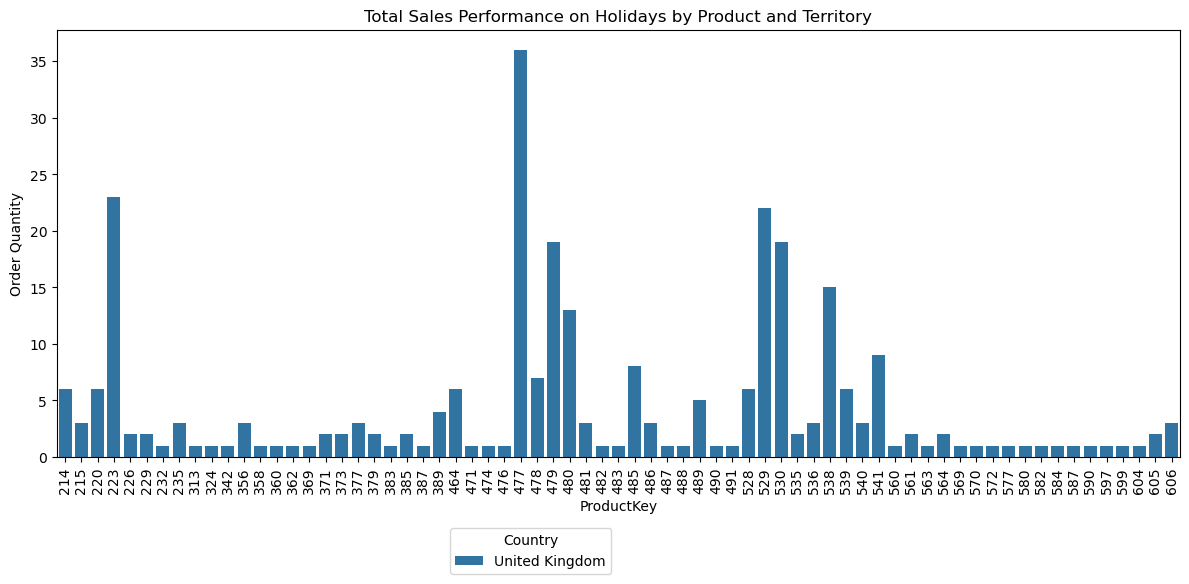

In [223]:
plt.figure(figsize=(12, 6))
sns.barplot(data=product_territory_performance, x='ProductKey', y='Total_orders', hue='Country')
plt.title('Total Sales Performance on Holidays by Product and Territory')
plt.xticks(rotation=90)
plt.ylabel('Order Quantity')
plt.xlabel('ProductKey')
plt.legend(title='Country',loc='upper right', bbox_to_anchor=(0.5, -0.15))
plt.tight_layout()
plt.show()

The visualizations of product and territory performance are highlighted above.